## Introduction

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Understanding the Dataset

In [87]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv("Titanic_Dataset.csv")

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
survival_label = []
survival_label.append(df['Survived'].where(df['Survived']==1).count())
survival_label.append(df['Survived'].where(df['Survived']==0).count())
survival_label

[342, 549]

In [91]:
fig = go.Figure([go.Bar(
    x = ['Yes','No'],
    y = survival_label,
)])
fig.update_layout(
    title_text = "Titanic dataset",
    xaxis = dict(
        title = "Survival Category"
    ),
    yaxis = dict(
        title = "No of Passengers"
    )
)
fig.show()

In [92]:
survival_yes_cat = []
survival_yes_cat.append(df['Survived'].where((df['Survived']==1) & (df['Sex']=='male')).count())
survival_yes_cat.append(df['Survived'].where((df['Survived']==1) & (df['Sex']=='female')).count())
survival_no_cat = []
survival_no_cat.append(df['Survived'].where((df['Survived']==0) & (df['Sex']=='male')).count())
survival_no_cat.append(df['Survived'].where((df['Survived']==0) & (df['Sex']=='female')).count())
survival_yes_cat,survival_no_cat

([109, 233], [468, 81])

In [93]:
fig = go.Figure(
    data = [
        go.Bar(name = 'Survived', x = ['No of male','No of Female'], y = survival_yes_cat),
        go.Bar(name = 'Did not Survive', x = ['No of male','No of Female'], y = survival_no_cat),
    ]
)
fig.update_layout(barmode = 'group')
fig.show()

## Cleaning the Dataset

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [96]:
df.shape

(891, 12)

In [97]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
round(100*df.isnull().sum()/len(df.index),2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [99]:
#Dropping cabin as it has 77% null values

df = df.drop(['Cabin'],axis = 1)

### Treating Age variable

In [100]:

df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [101]:
df['Age'].fillna((df['Age'].mean()),inplace =True)
df['Age_new'] = round(df['Age'])


In [102]:

df['Age_new'].value_counts()
df = df.drop(['Age'],axis = 1)

In [103]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_new
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0


### Treating Variable Embarked

In [104]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [105]:
#find the mode of 'Country'
embarked_mode=df['Embarked'].mode()[0]
embarked_mode

'S'

In [106]:
df['Embarked'].fillna(embarked_mode,inplace=True)
df['Embarked'].value_counts(normalize = True)

S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

In [107]:
round(100*df.isnull().sum()/len(df.index),2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
Age_new        0.0
dtype: float64

In [108]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_new
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.00,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.00,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.45,S,30.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.00,C,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,0,0,370376,7.75,Q,32.0


In [109]:
def object_map(x):
    return x.map({1: '1st class', 2: '2nd class', 3: '3rd class'})

# Applying the function to the two columns
df[['Pclass']] = df[['Pclass']].apply(object_map)

In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_new
0,1,0,3rd class,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1st class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
2,3,1,3rd class,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1st class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
4,5,0,3rd class,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0


### Visualizing Categorical Varables

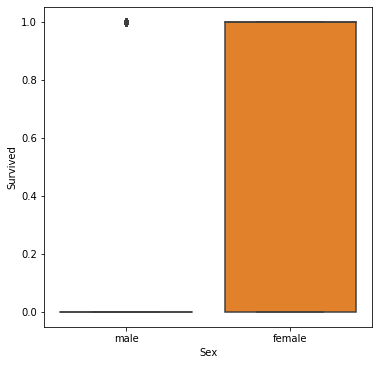

In [111]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'Sex', y = 'Survived', data = df)
plt.show()

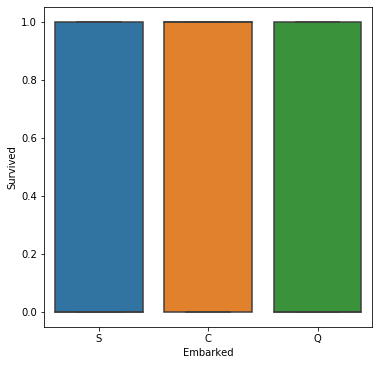

In [112]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'Embarked', y = 'Survived', data = df)
plt.show()

## Data Preparation

In [113]:
# name & ticket is not making any meaning so dropping it

df= df.drop(['Name','Ticket'],axis = 1)

In [114]:
### Treating Categorical variables

# Subset all categorical variables
df_categorical=df.select_dtypes(include=['object'])
df_categorical



,Pclass,Sex,Embarked
0,3rd class,male,S
1,1st class,female,C
2,3rd class,female,S
3,1st class,female,S
4,3rd class,male,S
...,...,...,...
886,2nd class,male,S
887,1st class,female,S
888,3rd class,female,S
889,1st class,male,C


In [115]:
# Convert into dummies
merged_data_dummies = pd.get_dummies(df_categorical[['Embarked','Sex','Pclass']], drop_first=True)
merged_data_dummies.head()

,Embarked_Q,Embarked_S,Sex_male,Pclass_2nd class,Pclass_3rd class
0,0,1,1,0,1
1,0,0,0,0,0
2,0,1,0,0,1
3,0,1,0,0,0
4,0,1,1,0,1


In [116]:
# Adding the results to master Dataframe
df = pd.concat([df, merged_data_dummies], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_new,Embarked_Q,Embarked_S,Sex_male,Pclass_2nd class,Pclass_3rd class
0,1,0,3rd class,male,1,0,7.2500,S,22.0,0,1,1,0,1
1,2,1,1st class,female,1,0,71.2833,C,38.0,0,0,0,0,0
2,3,1,3rd class,female,0,0,7.9250,S,26.0,0,1,0,0,1
3,4,1,1st class,female,1,0,53.1000,S,35.0,0,1,0,0,0
4,5,0,3rd class,male,0,0,8.0500,S,35.0,0,1,1,0,1


In [117]:

df= df.drop(['Sex','Embarked','Pclass'],axis = 1)
df.head()

,PassengerId,Survived,SibSp,Parch,Fare,Age_new,Embarked_Q,Embarked_S,Sex_male,Pclass_2nd class,Pclass_3rd class
0,1,0,1,0,7.2500,22.0,0,1,1,0,1
1,2,1,1,0,71.2833,38.0,0,0,0,0,0
2,3,1,0,0,7.9250,26.0,0,1,0,0,1
3,4,1,1,0,53.1000,35.0,0,1,0,0,0
4,5,0,0,0,8.0500,35.0,0,1,1,0,1


In [118]:
Q11 = df['Fare'].quantile(0.00)
Q14 = df['Fare'].quantile(0.99)
df['Fare'][df['Fare'] <= Q11]=Q11
df['Fare'][df['Fare'] >= Q14]=Q14

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
df.describe()

,PassengerId,Survived,SibSp,Parch,Fare,Age_new,Embarked_Q,Embarked_S,Sex_male,Pclass_2nd class,Pclass_3rd class
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,0.523008,0.381594,31.224767,29.754209,0.086420,0.725028,0.647587,0.206510,0.551066
std,257.353842,0.486592,1.102743,0.806057,42.524125,13.000828,0.281141,0.446751,0.477990,0.405028,0.497665
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,0.000000,0.000000,7.910400,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,0.000000,0.000000,14.454200,30.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,1.000000,0.000000,31.000000,35.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,8.000000,6.000000,249.006220,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000


df.info()

In [120]:
df['Sex_male'] = df['Sex_male'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

df['Pclass_2nd class'] = df['Pclass_2nd class'].astype(int)
df['Pclass_3rd class'] = df['Pclass_3rd class'].astype(int)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId         891 non-null int64
Survived            891 non-null int64
SibSp               891 non-null int64
Parch               891 non-null int64
Fare                891 non-null float64
Age_new             891 non-null float64
Embarked_Q          891 non-null int32
Embarked_S          891 non-null int32
Sex_male            891 non-null int32
Pclass_2nd class    891 non-null int32
Pclass_3rd class    891 non-null int32
dtypes: float64(2), int32(5), int64(4)
memory usage: 59.3 KB


In [123]:
### passengerid, sibsp.parch deosnot make any sense do dropping it

df = df.drop(['PassengerId','SibSp','Parch'],axis = 1)
df.head()

,Survived,Fare,Age_new,Embarked_Q,Embarked_S,Sex_male,Pclass_2nd class,Pclass_3rd class
0,0,7.2500,22.0,0,1,1,0,1
1,1,71.2833,38.0,0,0,0,0,0
2,1,7.9250,26.0,0,1,0,0,1
3,1,53.1000,35.0,0,1,0,0,0
4,0,8.0500,35.0,0,1,1,0,1


## Model Building

### Scaling

In [124]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

In [125]:
# Subset all categorical variabl
merged_data_numerical=df.select_dtypes(include=['float64','int32','int64'])
merged_data_numerical

,Survived,Fare,Age_new,Embarked_Q,Embarked_S,Sex_male,Pclass_2nd class,Pclass_3rd class
0,0,7.2500,22.0,0,1,1,0,1
1,1,71.2833,38.0,0,0,0,0,0
2,1,7.9250,26.0,0,1,0,0,1
3,1,53.1000,35.0,0,1,0,0,0
4,0,8.0500,35.0,0,1,1,0,1
...,...,...,...,...,...,...,...,...
886,0,13.0000,27.0,0,1,1,1,0
887,1,30.0000,19.0,0,1,0,0,0
888,0,23.4500,30.0,0,1,0,0,1
889,1,30.0000,26.0,0,0,1,0,0


### Train - Test Split

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
# putting feature variable to X
X = df.drop(['Survived'],axis = 1)
X.head()

,Fare,Age_new,Embarked_Q,Embarked_S,Sex_male,Pclass_2nd class,Pclass_3rd class
0,7.2500,22.0,0,1,1,0,1
1,71.2833,38.0,0,0,0,0,0
2,7.9250,26.0,0,1,0,0,1
3,53.1000,35.0,0,1,0,0,0
4,8.0500,35.0,0,1,1,0,1


In [128]:
# putting feature variable to y
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [129]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [130]:
scaler = MinMaxScaler()

X_train[['Fare','Age_new']] = scaler.fit_transform(X_train[['Fare','Age_new']])

X_train.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Fare,Age_new,Embarked_Q,Embarked_S,Sex_male,Pclass_2nd class,Pclass_3rd class
69,0.034788,0.351351,0,1,1,0,1
85,0.063653,0.445946,0,1,0,0,1
794,0.031709,0.337838,0,1,1,0,1
161,0.063251,0.540541,0,1,0,1,0
815,0.000000,0.405405,0,1,1,0,0


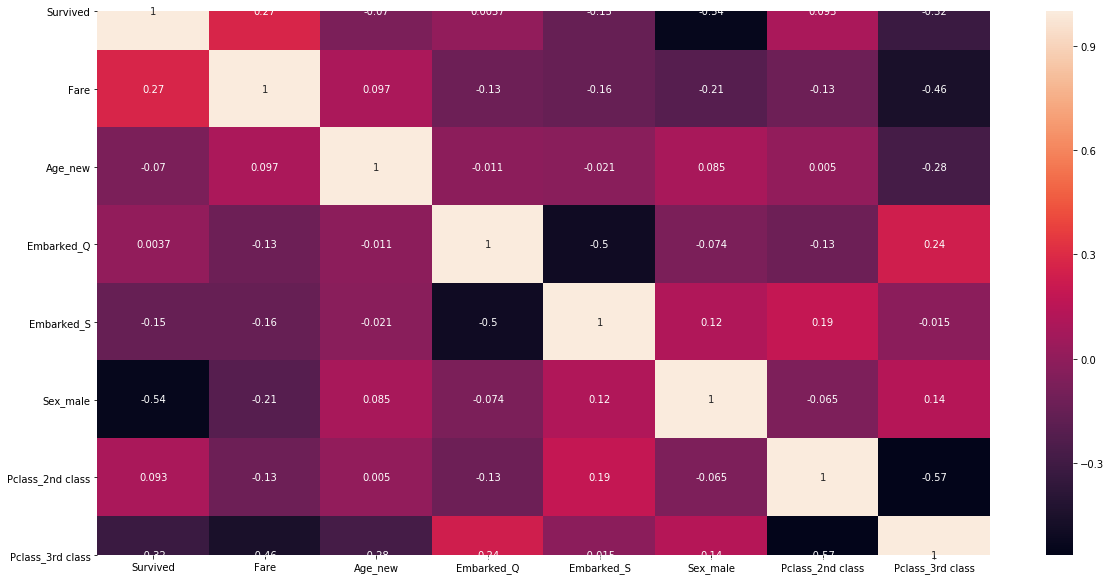

In [131]:
# heatmap to check corelation
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

### Running first training model


In [165]:
import statsmodels.api as sm

In [166]:
# logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      615
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -274.15
Date:                Mon, 30 Aug 2021   Deviance:                       548.29
Time:                        18:44:26   Pearson chi2:                     675.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.9483      0.588      6.712      0.000       2.795       5.101
Fare                -0.3537      0.810     -0.437      0.662      -1.941       1.233
Age_new             -2.4190      0.687     -3.520      0.000      -3.766      -1.072
Embarked_Q          -0.3071      0.457     -0.671      0.502      -1.204       0.589
Embarked_S          -0.6257      0.287     -2.179      0.029      -1.188      -0.063
Sex_male            -2.6730      0.233    -11.496      0.000      -3.129      -2.217
Pclass_2nd class    -0.8885      0.361     -2.460      0.014      -1.596      -0.181
Pclass_3rd class    -2.3320      0.366     -6.366      0.000      -3.050      -1.614
====================================================================================
"""

In [167]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      615
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -274.15
Date:                Mon, 30 Aug 2021   Deviance:                       548.29
Time:                        18:44:28   Pearson chi2:                     675.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.9483      0.588      6.712      0.000       2.795       5.101
Fare                -0.3537      0.810     -0.437      0.662      -1.941       1.233
Age_new             -2.4190      0.687     -3.520      0.000      -3.766      -1.072
Embarked_Q          -0.3071      0.457     -0.671      0.502      -1.204       0.589
Embarked_S          -0.6257      0.287     -2.179      0.029      -1.188      -0.063
Sex_male            -2.6730      0.233    -11.496      0.000      -3.129      -2.217
Pclass_2nd class    -0.8885      0.361     -2.460      0.014      -1.596      -0.181
Pclass_3rd class    -2.3320      0.366     -6.366      0.000      -3.050      -1.614
====================================================================================
"""

In [168]:
# Getting the predicted values on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

69     0.072783
85     0.472353
794    0.075095
161    0.751026
815    0.417963
516    0.787125
299    0.876771
454    0.064489
59     0.108255
879    0.880749
dtype: float64

In [169]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07278257, 0.4723526 , 0.07509525, 0.75102599, 0.41796314,
       0.78712535, 0.87677091, 0.06448902, 0.10825492, 0.8807491 ])

### Creating a dataframe with the actual convert flag and the predicted probabilities

In [170]:
y_train_pred_final = pd.DataFrame({'Survived': y_train.values, 'survive_prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Survived,survive_prob,CustID
0,0,0.072783,69
1,1,0.472353,85
2,0,0.075095,794
3,1,0.751026,161
4,0,0.417963,815


### Creating new column 'Survived' with 1 if Convert_Prob > 0.5 else 0

In [171]:
y_train_pred_final['predicted'] = y_train_pred_final.survive_prob.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

,Survived,survive_prob,CustID,predicted
0,0,0.072783,69,0
1,1,0.472353,85,0
2,0,0.075095,794,0
3,1,0.751026,161,1
4,0,0.417963,815,0


In [172]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted)
print(confusion)

[[340  50]
 [ 71 162]]


In [173]:
# Accuracy accuracy = correctly predicted labels/ total no of labels
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.8057784911717496


## Checking VIF

In [174]:
# Let's drop the 'hum' column
X_train_sm.drop("Fare",axis=1,inplace=True)
X_train_sm

,const,Age_new,Embarked_Q,Embarked_S,Sex_male,Pclass_2nd class,Pclass_3rd class
69,1.0,0.351351,0,1,1,0,1
85,1.0,0.445946,0,1,0,0,1
794,1.0,0.337838,0,1,1,0,1
161,1.0,0.540541,0,1,0,1,0
815,1.0,0.405405,0,1,1,0,0
...,...,...,...,...,...,...,...
855,1.0,0.243243,0,1,0,0,1
871,1.0,0.635135,0,1,0,0,0
835,1.0,0.527027,0,0,0,0,0
792,1.0,0.405405,0,1,0,0,1


In [175]:
# check for the VIF Variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe thdt will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
0,const,16.35
6,Pclass_3rd class,1.88
5,Pclass_2nd class,1.62
2,Embarked_Q,1.50
3,Embarked_S,1.48
1,Age_new,1.15
4,Sex_male,1.05


### Metrics beyond simply accuracy

In [176]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [177]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6952789699570815

In [178]:
# Let us calculate specificity
TN / float(TN+FP)

0.8717948717948718

In [179]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.1282051282051282


In [180]:
# positive predictive value 
print (TP / float(TP+FP))

0.7641509433962265


In [181]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8272506082725061


### Plotting the ROC Curve¶

In [182]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [183]:
fpr,tpr,threshold=metrics.roc_curve(y_train_pred_final.Survived,y_train_pred_final.survive_prob, drop_intermediate=False)

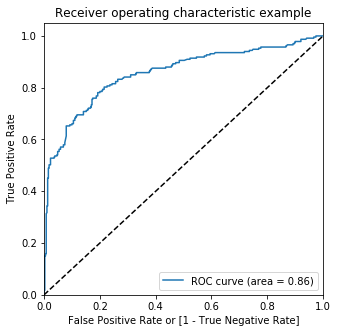

In [185]:
draw_roc(y_train_pred_final.Survived,y_train_pred_final.survive_prob)

### Finding optimal cutoff point

In [186]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range (10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.survive_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Survived,survive_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.072783,69,0,1,0,0,0,0,0,0,0,0,0
1,1,0.472353,85,0,1,1,1,1,1,0,0,0,0,0
2,0,0.075095,794,0,1,0,0,0,0,0,0,0,0,0
3,1,0.751026,161,1,1,1,1,1,1,1,1,1,0,0
4,0,0.417963,815,0,1,1,1,1,1,0,0,0,0,0


In [188]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373997  1.000000  0.000000
0.1   0.1  0.629213  0.914163  0.458974
0.2   0.2  0.709470  0.875536  0.610256
0.3   0.3  0.762440  0.832618  0.720513
0.4   0.4  0.789727  0.789700  0.789744
0.5   0.5  0.805778  0.695279  0.871795
0.6   0.6  0.800963  0.557940  0.946154
0.7   0.7  0.799358  0.502146  0.976923
0.8   0.8  0.768860  0.403433  0.987179
0.9   0.9  0.696629  0.201717  0.992308


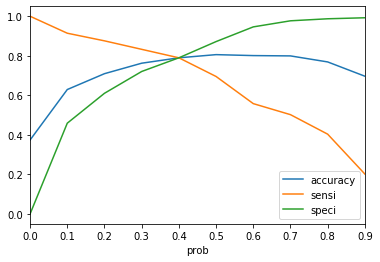

In [189]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [190]:
y_train_pred_final['final_predicted'] = y_train_pred_final.survive_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Survived,survive_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.072783,69,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.472353,85,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.075095,794,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.751026,161,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.417963,815,0,1,1,1,1,1,0,0,0,0,0,1


In [191]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.survive_prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Survived,survive_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.072783,69,0,1,0,0,0,0,0,0,0,0,0,0,7
1,1,0.472353,85,0,1,1,1,1,1,0,0,0,0,0,1,47
2,0,0.075095,794,0,1,0,0,0,0,0,0,0,0,0,0,8
3,1,0.751026,161,1,1,1,1,1,1,1,1,1,0,0,1,75
4,0,0.417963,815,0,1,1,1,1,1,0,0,0,0,0,1,42
5,1,0.787125,516,1,1,1,1,1,1,1,1,1,0,0,1,79
6,1,0.876771,299,1,1,1,1,1,1,1,1,1,1,0,1,88
7,0,0.064489,454,0,1,0,0,0,0,0,0,0,0,0,0,6
8,0,0.108255,59,0,1,1,0,0,0,0,0,0,0,0,0,11
9,1,0.880749,879,1,1,1,1,1,1,1,1,1,1,0,1,88


In [192]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Survived']==1,['Survived','final_predicted']]
checking_df['final_predicted'].value_counts()

1    184
0     49
Name: final_predicted, dtype: int64

In [193]:
# check the precentage of final_predicted conversions

184/float(184+49)

0.7896995708154506

In [194]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.7897271268057785

In [195]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion2

array([[308,  82],
       [ 49, 184]], dtype=int64)

In [196]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [197]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.7896995708154506

In [198]:
# Let us calculate specificity
TN / float(TN+FP)

0.7897435897435897

In [199]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.21025641025641026


In [200]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6917293233082706


In [201]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8627450980392157


### Precision and Recall¶

In [202]:
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
confusion

array([[340,  50],
       [ 71, 162]], dtype=int64)

In [203]:
# Precision

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7641509433962265

In [204]:
# Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6952789699570815

In [205]:
from sklearn.metrics import precision_score, recall_score

In [206]:
precision_score(y_train_pred_final.Survived, y_train_pred_final.predicted)

0.7641509433962265

In [207]:
recall_score(y_train_pred_final.Survived, y_train_pred_final.predicted)

0.6952789699570815

### Precision and Recall Tradoff


In [208]:
from sklearn.metrics import precision_recall_curve

In [209]:
y_train_pred_final.Survived,y_train_pred_final.predicted

(0      0
 1      1
 2      0
 3      1
 4      0
       ..
 618    1
 619    1
 620    1
 621    0
 622    1
 Name: Survived, Length: 623, dtype: int64, 0      0
 1      0
 2      0
 3      1
 4      0
       ..
 618    1
 619    1
 620    1
 621    0
 622    1
 Name: predicted, Length: 623, dtype: int64)

In [210]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Survived,y_train_pred_final.survive_prob)

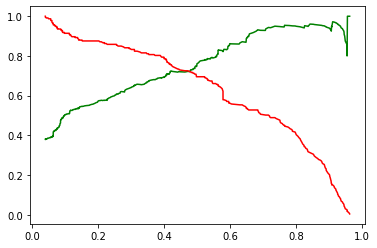

In [211]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making prediction on Test set

In [212]:
X_test[['Fare','Age_new']] = scaler.fit_transform(X_test[['Fare','Age_new']])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [214]:

X_test.head()

,Fare,Age_new,Embarked_Q,Embarked_S,Sex_male,Pclass_2nd class,Pclass_3rd class
205,0.042017,0.012658,0,1,0,0,1
44,0.031643,0.227848,1,0,0,0,1
821,0.034788,0.329114,0,1,1,0,1
458,0.042168,0.620253,0,1,0,1,0
795,0.052208,0.481013,0,1,1,1,0


In [215]:
X_test_sm = sm.add_constant(X_test)

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [216]:
y_test_pred = res.predict(X_test_sm)

In [217]:
y_test_pred[:10]

205    0.720123
44     0.678472
821    0.076497
458    0.714782
795    0.194498
118    0.554618
424    0.096936
678    0.410447
269    0.889812
229    0.516592
dtype: float64

In [218]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [219]:
# Let's see the head
y_pred_1.head()

,0
205,0.720123
44,0.678472
821,0.076497
458,0.714782
795,0.194498


In [220]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [221]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [222]:
# Removing index for both dataframes to append them side by side 
#  reset_index() function is used to generate a new DataFrame or Series with the index reset. 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [223]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [224]:
y_pred_final.head()

,Survived,CustID,0
0,0,205,0.720123
1,1,44,0.678472
2,1,821,0.076497
3,1,458,0.714782
4,0,795,0.194498


In [225]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'survive_prob'})

In [226]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Survived,CustID,survive_prob
0,0,205,0.720123
1,1,44,0.678472
2,1,821,0.076497
3,1,458,0.714782
4,0,795,0.194498


In [227]:
y_pred_final = y_pred_final[["CustID", "Survived", "survive_prob"]]

In [228]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Survived,survive_prob
0,205,0,0.720123
1,44,1,0.678472
2,821,1,0.076497
3,458,1,0.714782
4,795,0,0.194498


In [229]:
y_pred_final['final_predicted'] = y_pred_final.survive_prob.map(lambda x: 1 if x > 0.4 else 0)

In [230]:
y_pred_final.head()

,CustID,Survived,survive_prob,final_predicted
0,205,0,0.720123,1
1,44,1,0.678472,1
2,821,1,0.076497,0
3,458,1,0.714782,1
4,795,0,0.194498,0


In [231]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.survive_prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,CustID,Survived,survive_prob,final_predicted,lead_score
0,205,0,0.720123,1,72
1,44,1,0.678472,1,68
2,821,1,0.076497,0,8
3,458,1,0.714782,1,71
4,795,0,0.194498,0,19
5,118,0,0.554618,1,55
6,424,0,0.096936,0,10
7,678,0,0.410447,1,41
8,269,1,0.889812,1,89
9,229,0,0.516592,1,52


In [232]:
# checking if cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Survived']==1,['Survived','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    81
0    28
Name: final_predicted, dtype: int64

In [233]:
# check the precentage of final_predicted conversions on test data

81/float(81+28)

0.7431192660550459

In [234]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Survived, y_pred_final.final_predicted)

0.7798507462686567

In [235]:
confusion2 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.final_predicted )
confusion2

array([[128,  31],
       [ 28,  81]], dtype=int64)

In [236]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [237]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7431192660550459

In [238]:
# Let us calculate specificity
TN / float(TN+FP)

0.8050314465408805

### Conclusion :

#### While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
#### Accuracy, Sensitivity and Specificity values of test set are around 77%, 74% and 80% which are approximately closer to the respective values calculated using trained set which is 78%, 78% and 78% respectively.
#### Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 78%
#### Hence overall this model seems to be good.

### Promising Factor From Model

#### Obviously female survivor are more than male as visualized in plot.
#### P class 3rd and 2nd i.e. socio economic status has survived
#### Port of embarkation survived are Queenstown and Southampton


## Random Forest Regressor¶

In [246]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [242]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [243]:
print(random_regressor.best_estimator_)
random_regressor.best_params_

RandomForestRegressor(n_estimators=400)


{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1}

In [244]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [248]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
#print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", accuracy_score(X_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------


ValueError: Classification metrics can't handle a mix of continuous-multioutput and continuous targets